1. Source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

2. A list of data collected by the mayo clinic that relates to cirrhosis of the liver.

3. stage

4. A person

5. Classification

6. 19

7. 418

8. None

1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)


In [1]:
#Imports
import pandas as pd
import numpy as np
#
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/project 2/Project-2/imports/cirrhosis.csv')

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

#Data Cleaing

In [7]:
df.reset_index()

,index,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,D,D-penicillamine,25594,M,N,N,N,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,CL,Placebo,13918,F,N,Y,Y,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,414,681,D,NaN,24472,F,NaN,NaN,NaN,...,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,...,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,...,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,416,417,691,C,NaN,21185,F,NaN,NaN,NaN,...,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [8]:
#Columns to lower case for ease of use.
df.columns=df.columns.str.lower()

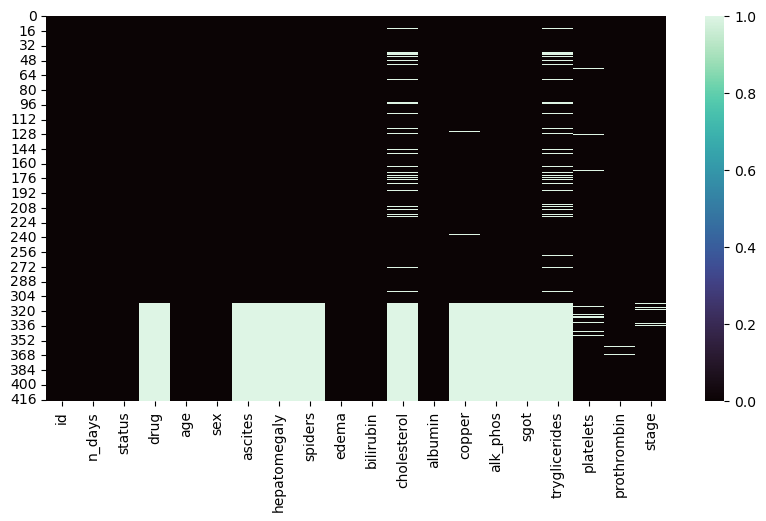

In [9]:
#Visual for missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(),cmap='mako');

In [10]:
#Percentages of missing values.
percent_missing=df.isna().sum()*100/len(df)
print(percent_missing)

id                0.000000
n_days            0.000000
status            0.000000
drug             25.358852
age               0.000000
sex               0.000000
ascites          25.358852
hepatomegaly     25.358852
spiders          25.358852
edema             0.000000
bilirubin         0.000000
cholesterol      32.057416
albumin           0.000000
copper           25.837321
alk_phos         25.358852
sgot             25.358852
tryglicerides    32.535885
platelets         2.631579
prothrombin       0.478469
stage             1.435407
dtype: float64


In [11]:
#Copies for Exploratory data analysis and machine learning
eda_df=df.copy()
ml_df=df.copy()

In [12]:
eda_df.drop(columns=['id'],inplace=True)
ml_df.drop(columns=['id'],inplace=True)

In [13]:
#Divide age by 365 to convert to years.
eda_df['age']=(eda_df['age']/365)
ml_df['age']=(ml_df['age']/365)

In [14]:
#Float64 to int64
eda_df['age']=eda_df['age'].astype('int64')
ml_df['age']=ml_df['age'].astype('int64')

In [15]:
#Filters for cleaning up missing values.
cat_col=eda_df.select_dtypes(['object']).columns
num_col=eda_df.select_dtypes(['float64','int64']).columns

In [16]:
cat_col

Index(['status', 'drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema'], dtype='object')

In [17]:
num_col

Index(['n_days', 'age', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin',
       'stage'],
      dtype='object')

In [18]:
#We will impute using mode for categorical columns
for k in cat_col:
  eda_df[k].fillna(df[k].mode().values[0],inplace=True)

In [19]:
#Using Median for Numeric columns.
for k in num_col:
  eda_df[k].fillna(df[k].median(),inplace=True)

In [20]:
eda_df.isna().sum()

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64

#Exploritory data analysis visualizations

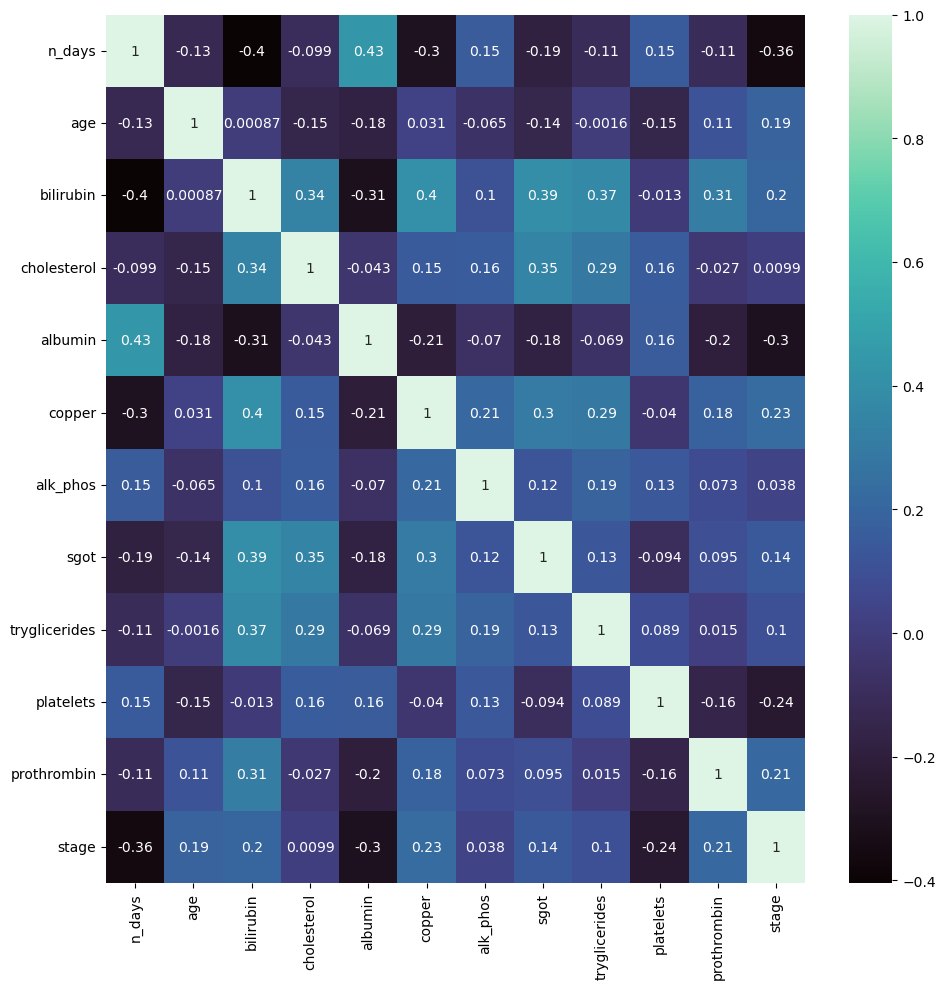

In [21]:
#Heat Map
corr=eda_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.tight_layout();

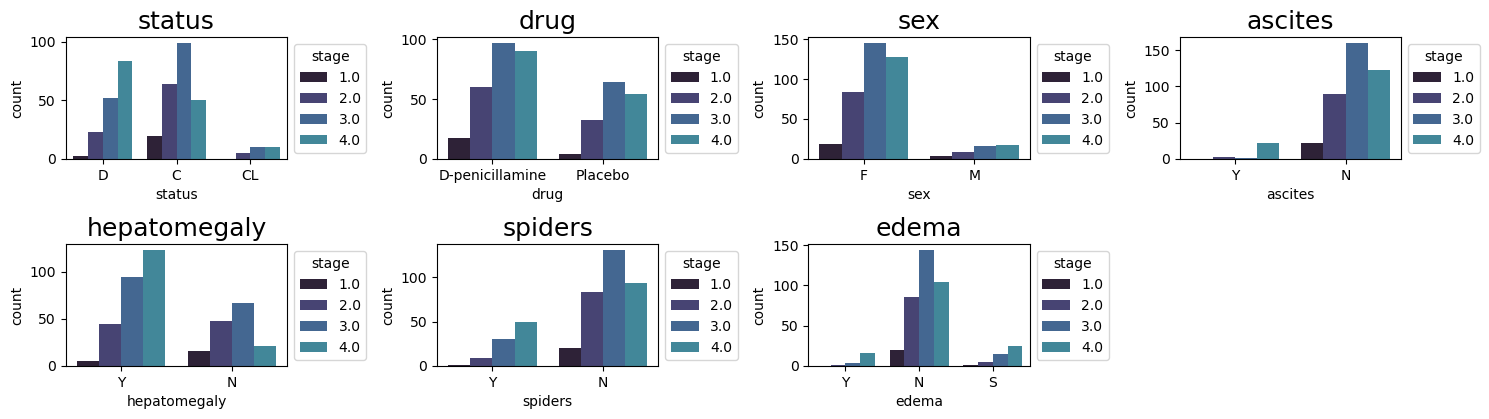

In [22]:
title2=cat_col[:].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(cat_col[:]):
    plt.subplot(4,4,i+1)
    sns.set_palette('mako')
    sns.countplot(x=eda_df[variable],hue='stage',data=eda_df)
    plt.tight_layout()
    plt.title(title2[i],size=18)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1),title='stage')

#Identify Outliers

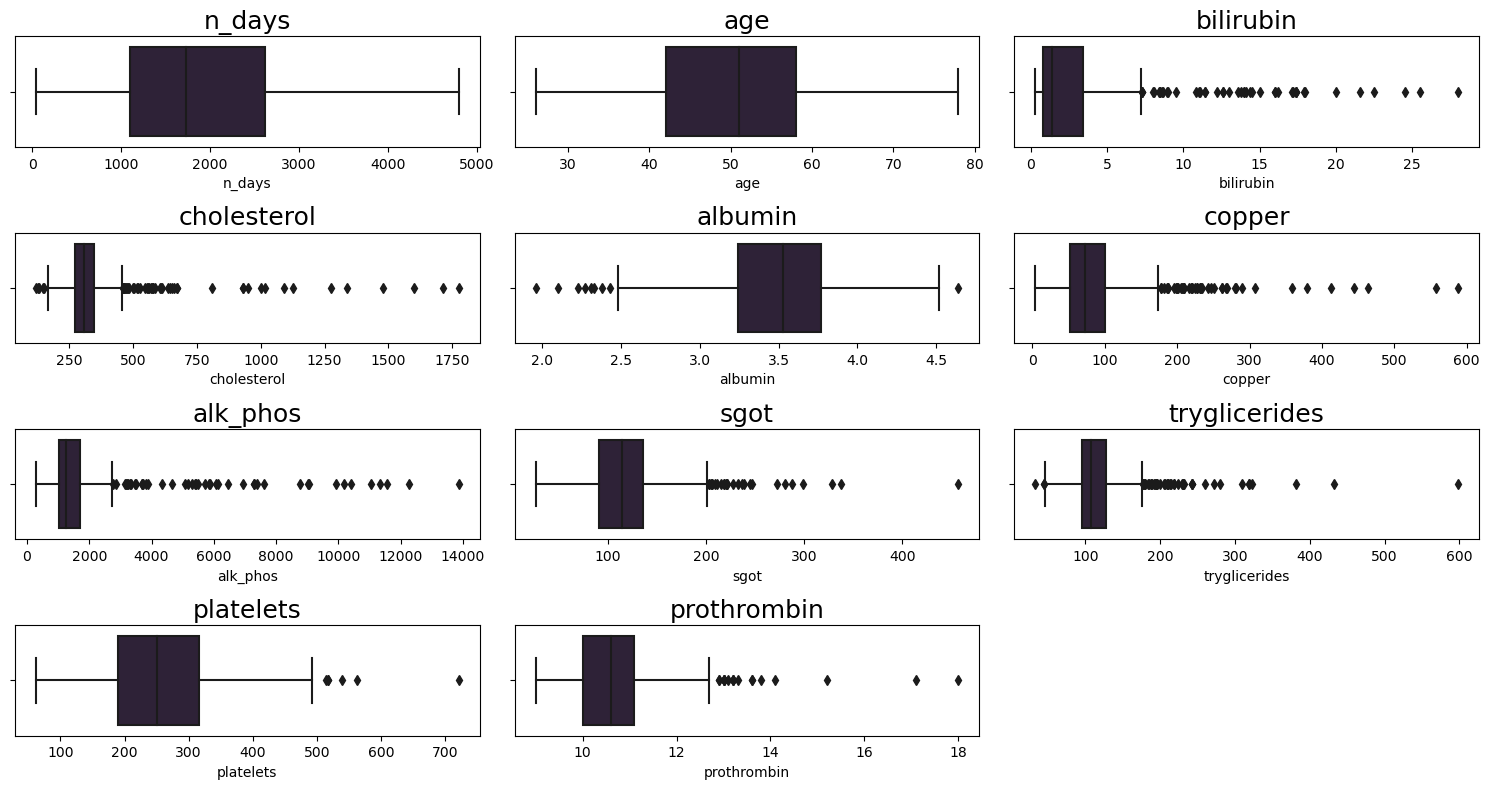

In [23]:
title=num_col[:-1].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(num_col[:-1]):
    plt.subplot(4,3,i+1)
    sns.set_palette('mako')
    sns.boxplot(x=eda_df[variable],data=eda_df,orient="v")
    plt.tight_layout()
    plt.title(title[i],size = 18)

#Outliers May Include

*   Bilirubin
*   Cholesterol
*   Albumin
*   Copper
*   Alk_phos
*   Sgot
*   Tryglicerides
*   Platelets
*   Prothrombin

